<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%204/200968146_DL_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

## Importing Models for Transfer Learning

In [138]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2

## Defining the AlexNet Architecture

In [82]:
def AlexNet(classes):

  model = tf.keras.Sequential([
      tf.keras.Input(shape=(224,224,3), name = "ConvolutionInput"),
      tf.keras.layers.Conv2D(96, strides=4 ,kernel_size=(11,11), activation='relu', padding='valid', name = "ConvolutionLayer-1"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-1"),
      tf.keras.layers.BatchNormalization(name = "Norm-1"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(5,5), activation='relu', padding='same', name = "ConvolutionLayer-2"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2),name = "PoolingLayer-2"),
      tf.keras.layers.BatchNormalization(name = "Norm-2"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-3"),
      tf.keras.layers.Conv2D(384, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-4"),
      tf.keras.layers.Conv2D(256, strides=1 ,kernel_size=(3,3), activation='relu', padding='same', name = "ConvolutionLayer-5"),
      tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=2, name = "PoolingLayer-3"),
      tf.keras.layers.BatchNormalization(name = "Norm-3"),
      tf.keras.layers.Flatten(name = "NeuralNetInput"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-1"),
      tf.keras.layers.Dropout(rate = 0.5, name = "Dropout-1"),
      tf.keras.layers.Dense(4096, activation='relu', name = "HiddenLayer-2"),
      tf.keras.layers.Dropout(rate = 0.5, name = "Dropout-2"),
      tf.keras.layers.Dense(classes, activation='softmax', name = "OutputLayer")
    ])
  
  model.summary()
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [144]:
def VGG_16(classes):
  base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers

  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [84]:
def GoogleNet(classes):
  base_model = InceptionV3(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [85]:
def ResNet50(classes):
  base_model = ResNet50V2(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [136]:
def EfficientNet(classes):
  base_model = EfficientNetB0(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

In [139]:
def MobileNet(classes):
  base_model = MobileNetV2(input_shape = (224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', name='HiddenLayer-1'),
    tf.keras.layers.Dense(classes, activation='softmax', name='OutputLayer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
  return model

## Cats and Dogs dataset

- **Dowloading the dataset**

In [88]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 17:04:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  78.5MB/s    in 0.8s    

2022-08-23 17:04:13 (78.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



- **Extracting the zip file to work with**

In [89]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

- **Normalizing the data**

In [90]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

- **Defining the working directories for train and validation sets**

In [91]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

- **Generating class labels (binary in this case) for our dataset**

In [92]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [93]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


- **Checking if everything is working fine by displaying one image from each class**

In [94]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.558.jpg', 'cat.350.jpg', 'cat.127.jpg', 'cat.247.jpg', 'cat.30.jpg', 'cat.648.jpg', 'cat.753.jpg', 'cat.819.jpg', 'cat.728.jpg', 'cat.81.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


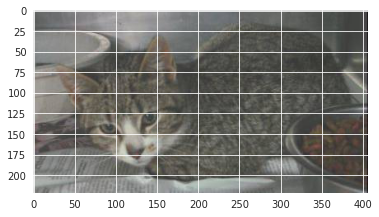

In [95]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

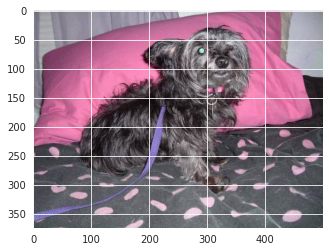

In [96]:
plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[0])))

## Building the AlexNet model

In [97]:
alexnet_model = AlexNet(classes = 2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 54, 54, 96)       34944     
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 26, 26, 96)       0         
 D)                                                              
                                                                 
 Norm-1 (BatchNormalization)  (None, 26, 26, 96)       384       
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 26, 26, 256)      614656    
                                                                 
 PoolingLayer-2 (MaxPooling2  (None, 12, 12, 256)      0         
 D)                                                              
                                                                 
 Norm-2 (BatchNormalization)  (None, 12, 12, 256)     

## Testing the AlexNet model

In [98]:
alexnet_history = alexnet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 12s 111ms/step - loss: 2.9283 - accuracy: 0.5015 - val_loss: 2.5558 - val_accuracy: 0.5060
Epoch 2/4
100/100 [==============================] - 11s 105ms/step - loss: 0.8190 - accuracy: 0.5495 - val_loss: 0.6790 - val_accuracy: 0.5780
Epoch 3/4
100/100 [==============================] - 11s 113ms/step - loss: 0.7543 - accuracy: 0.5820 - val_loss: 0.7001 - val_accuracy: 0.5580
Epoch 4/4
100/100 [==============================] - 10s 105ms/step - loss: 0.7220 - accuracy: 0.5830 - val_loss: 0.6712 - val_accuracy: 0.5930


## Implementing Transfer Learning using the following Models
- **VGG16**
- **GoogleNet**
- **ResNet50**
- **EfficientNetB0**
- **MobileNetV2**

In [145]:
vgg16_model = VGG_16(classes = 2)

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              51382272  
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 66,101,058
Trainable params: 51,386,370
Non-trainable params: 14,714,688
_________________________________________________________________


In [146]:
vgg16_history = vgg16_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 22s 194ms/step - loss: 0.5034 - accuracy: 0.8300 - val_loss: 0.2566 - val_accuracy: 0.8950
Epoch 2/4
100/100 [==============================] - 19s 191ms/step - loss: 0.1284 - accuracy: 0.9550 - val_loss: 0.2194 - val_accuracy: 0.9120
Epoch 3/4
100/100 [==============================] - 20s 203ms/step - loss: 0.0516 - accuracy: 0.9895 - val_loss: 0.2257 - val_accuracy: 0.9090
Epoch 4/4
100/100 [==============================] - 19s 195ms/step - loss: 0.0314 - accuracy: 0.9930 - val_loss: 0.2239 - val_accuracy: 0.9070


In [99]:
googlenet_model = GoogleNet(classes = 2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              104859648 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 126,666,530
Trainable params: 104,863,746
Non-trainable params: 21,802,784
_________________________________________________________________


In [100]:
googlenet_history = googlenet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 50s 135ms/step - loss: 0.6005 - accuracy: 0.9505 - val_loss: 0.2535 - val_accuracy: 0.9790
Epoch 2/4
100/100 [==============================] - 12s 122ms/step - loss: 0.1257 - accuracy: 0.9865 - val_loss: 0.1772 - val_accuracy: 0.9870
Epoch 3/4
100/100 [==============================] - 12s 122ms/step - loss: 0.0242 - accuracy: 0.9965 - val_loss: 0.1587 - val_accuracy: 0.9830
Epoch 4/4
100/100 [==============================] - 12s 123ms/step - loss: 2.8300e-04 - accuracy: 1.0000 - val_loss: 0.1376 - val_accuracy: 0.9830


In [114]:
resnet_model = ResNet50(classes = 2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              205522944 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 229,091,842
Trainable params: 205,527,042
Non-trainable params: 23,564,800
_________________________________________________________________


In [124]:
resnet_history = resnet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 14s 144ms/step - loss: 0.0755 - accuracy: 0.9975 - val_loss: 1.0810 - val_accuracy: 0.9770
Epoch 2/4
100/100 [==============================] - 14s 139ms/step - loss: 0.0805 - accuracy: 0.9955 - val_loss: 0.7120 - val_accuracy: 0.9850
Epoch 3/4
100/100 [==============================] - 15s 151ms/step - loss: 0.0623 - accuracy: 0.9980 - val_loss: 0.8277 - val_accuracy: 0.9800
Epoch 4/4
100/100 [==============================] - 14s 141ms/step - loss: 0.0383 - accuracy: 0.9990 - val_loss: 0.6102 - val_accuracy: 0.9870


In [137]:
efficientnet_model = EfficientNet(classes = 2)

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              128452608 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 132,506,277
Trainable params: 128,456,706
Non-trainable params: 4,049,571
_________________________________________________________________


In [140]:
efficientnet_history = efficientnet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 20s 133ms/step - loss: 1.2935 - accuracy: 0.4790 - val_loss: 0.7195 - val_accuracy: 0.5000
Epoch 2/4
100/100 [==============================] - 12s 118ms/step - loss: 0.9560 - accuracy: 0.4840 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 3/4
100/100 [==============================] - 12s 118ms/step - loss: 0.9757 - accuracy: 0.4910 - val_loss: 0.7450 - val_accuracy: 0.5000
Epoch 4/4
100/100 [==============================] - 12s 118ms/step - loss: 1.0416 - accuracy: 0.4950 - val_loss: 0.7991 - val_accuracy: 0.5000


In [141]:
mobilenet_model = MobileNet(classes = 2)

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 2048)              128452608 
                                                                 
 OutputLayer (Dense)         (None, 2)                 4098      
                                                                 
Total params: 130,714,690
Trainable params: 128,456,706
Non-trainable params: 2,257,984
_________________________________________________________________


In [142]:
mobilenet_history = mobilenet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 14s 119ms/step - loss: 0.6512 - accuracy: 0.9440 - val_loss: 0.0474 - val_accuracy: 0.9810
Epoch 2/4
100/100 [==============================] - 11s 114ms/step - loss: 0.0129 - accuracy: 0.9950 - val_loss: 0.0962 - val_accuracy: 0.9790
Epoch 3/4
100/100 [==============================] - 11s 112ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0688 - val_accuracy: 0.9850
Epoch 4/4
100/100 [==============================] - 11s 111ms/step - loss: 7.5224e-05 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9850


## Tabulation of all the models

In [149]:
data = {'Loss' : [alexnet_history.history["loss"][-1], vgg16_history.history["loss"][-1],googlenet_history.history["loss"][-1], resnet_history.history["loss"][-1], efficientnet_history.history["loss"][-1], mobilenet_history.history["loss"][-1]],
        'Accuracy' : [alexnet_history.history["accuracy"][-1], vgg16_history.history["accuracy"][-1],googlenet_history.history["accuracy"][-1], resnet_history.history["accuracy"][-1], efficientnet_history.history["accuracy"][-1], mobilenet_history.history["accuracy"][-1]], 
        'Validation Loss' : [alexnet_history.history["val_loss"][-1], vgg16_history.history["val_loss"][-1],googlenet_history.history["val_loss"][-1], resnet_history.history["val_loss"][-1], efficientnet_history.history["val_loss"][-1], mobilenet_history.history["val_loss"][-1]], 
        'Validation Accuracy' : [alexnet_history.history["val_accuracy"][-1], vgg16_history.history["val_accuracy"][-1],googlenet_history.history["val_accuracy"][-1], resnet_history.history["val_accuracy"][-1], efficientnet_history.history["val_accuracy"][-1], mobilenet_history.history["val_accuracy"][-1]]}
index = ['AlexNet', 'VGG16', 'GoogleNet', 'ResNet50', 'EfficientNetB0', 'MobileNetV2']
tab = pd.DataFrame(data, index=index)
tab.head(10)

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.722028,0.583,0.671161,0.593
VGG16,0.031380,0.993,0.223922,0.907
GoogleNet,0.000283,1.000,0.137578,0.983
ResNet50,0.038250,0.999,0.610213,0.987
EfficientNetB0,1.041619,0.495,0.799090,0.500
MobileNetV2,0.000075,1.000,0.069926,0.985


## Horse and Zebra Dataset

- **Implementing the same stesp as for Cats and Dogs dataset**

In [150]:
!wget --no-check-certificate \
    https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip \
    -O /tmp/horse2zebra.zip

--2022-08-23 18:04:44--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘/tmp/horse2zebra.zip’

/tmp/horse2zebra.zi 100%[===================>] 111.45M  78.6MB/s    in 1.4s    

2022-08-23 18:04:46 (78.6 MB/s) - ‘/tmp/horse2zebra.zip’ saved [116867962/116867962]



In [151]:
local_zip = '/tmp/horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

- **This dataset by default contains seperate folders for horse and zebras but not under train and validation parent directories**
- **Adding the train and validation data into their respective directories**

In [152]:
!mkdir -v /tmp/horse2zebra/train /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/testA /tmp/horse2zebra/testB /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/trainA /tmp/horse2zebra/trainB /tmp/horse2zebra/train

mkdir: cannot create directory ‘/tmp/horse2zebra/train’: File exists
mkdir: cannot create directory ‘/tmp/horse2zebra/validation’: File exists
mv: cannot move '/tmp/horse2zebra/testA' to '/tmp/horse2zebra/validation/testA': Directory not empty
mv: cannot move '/tmp/horse2zebra/testB' to '/tmp/horse2zebra/validation/testB': Directory not empty
mv: cannot move '/tmp/horse2zebra/trainA' to '/tmp/horse2zebra/train/trainA': Directory not empty
mv: cannot move '/tmp/horse2zebra/trainB' to '/tmp/horse2zebra/train/trainB': Directory not empty


In [153]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [154]:
base_dir = '/tmp/horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horse_dir = os.path.join(train_dir, 'trainA')

train_zebra_dir = os.path.join(train_dir, 'trainB')

validation_horse_dir = os.path.join(validation_dir, 'testA')

validation_zebra_dir = os.path.join(validation_dir, 'testB')

In [162]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224), 
        batch_size=20,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [163]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [157]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
print(train_zebra_fnames[:10])

['n02381460_3664.jpg', 'n02381460_2341.jpg', 'n02381460_2049.jpg', 'n02381460_4117.jpg', 'n02381460_5545.jpg', 'n02381460_155.jpg', 'n02381460_1227.jpg', 'n02381460_1486.jpg', 'n02381460_948.jpg', 'n02381460_4674.jpg']
['n02391049_7566.jpg', 'n02391049_8616.jpg', 'n02391049_2959.jpg', 'n02391049_725.jpg', 'n02391049_2157.jpg', 'n02391049_6413.jpg', 'n02391049_7851.jpg', 'n02391049_6918.jpg', 'n02391049_1846.jpg', 'n02391049_8565.jpg']


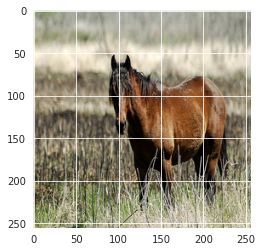

In [158]:
plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0])))

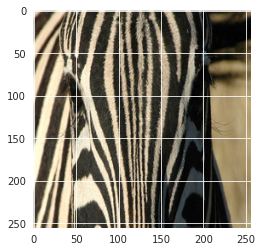

In [159]:
plt.imshow(mpimg.imread(os.path.join(train_zebra_dir, train_zebra_fnames[0])))

In [164]:
alexnet_history = alexnet_model.fit(train_generator, epochs=8, validation_data=validation_generator, verbose=1)

Epoch 1/8
121/121 [==============================] - 8s 68ms/step - loss: 0.5844 - accuracy: 0.7172 - val_loss: 0.9749 - val_accuracy: 0.5692
Epoch 2/8
121/121 [==============================] - 9s 70ms/step - loss: 0.4894 - accuracy: 0.7668 - val_loss: 1.0367 - val_accuracy: 0.5346
Epoch 3/8
121/121 [==============================] - 11s 92ms/step - loss: 0.3882 - accuracy: 0.8326 - val_loss: 0.7616 - val_accuracy: 0.6577
Epoch 4/8
121/121 [==============================] - 8s 68ms/step - loss: 0.3773 - accuracy: 0.8342 - val_loss: 0.9747 - val_accuracy: 0.5846
Epoch 5/8
121/121 [==============================] - 8s 65ms/step - loss: 0.3711 - accuracy: 0.8442 - val_loss: 2.5107 - val_accuracy: 0.6154
Epoch 6/8
121/121 [==============================] - 8s 65ms/step - loss: 0.3255 - accuracy: 0.8571 - val_loss: 0.4712 - val_accuracy: 0.7846
Epoch 7/8
121/121 [==============================] - 8s 65ms/step - loss: 0.2910 - accuracy: 0.8780 - val_loss: 1.3325 - val_accuracy: 0.5885
Epoch

In [165]:
vgg16_history = vgg16_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
121/121 [==============================] - 18s 149ms/step - loss: 0.2934 - accuracy: 0.8963 - val_loss: 0.1033 - val_accuracy: 0.9654
Epoch 2/4
121/121 [==============================] - 17s 143ms/step - loss: 0.0623 - accuracy: 0.9783 - val_loss: 0.0976 - val_accuracy: 0.9731
Epoch 3/4
121/121 [==============================] - 17s 144ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.1022 - val_accuracy: 0.9654
Epoch 4/4
121/121 [==============================] - 17s 144ms/step - loss: 0.0248 - accuracy: 0.9946 - val_loss: 0.0999 - val_accuracy: 0.9692


In [166]:
googlenet_history = googlenet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
121/121 [==============================] - 11s 90ms/step - loss: 0.3893 - accuracy: 0.9667 - val_loss: 0.0839 - val_accuracy: 0.9808
Epoch 2/4
121/121 [==============================] - 11s 87ms/step - loss: 0.0118 - accuracy: 0.9938 - val_loss: 0.0700 - val_accuracy: 0.9846
Epoch 3/4
121/121 [==============================] - 10s 84ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9885
Epoch 4/4
121/121 [==============================] - 10s 81ms/step - loss: 5.0148e-04 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9885


In [167]:
resnet_history = resnet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
121/121 [==============================] - 14s 113ms/step - loss: 1.6660 - accuracy: 0.9546 - val_loss: 0.8233 - val_accuracy: 0.9846
Epoch 2/4
121/121 [==============================] - 13s 109ms/step - loss: 0.0854 - accuracy: 0.9921 - val_loss: 0.8040 - val_accuracy: 0.9846
Epoch 3/4
121/121 [==============================] - 13s 110ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.7140 - val_accuracy: 0.9846
Epoch 4/4
121/121 [==============================] - 14s 112ms/step - loss: 1.4806e-06 - accuracy: 1.0000 - val_loss: 0.7173 - val_accuracy: 0.9846


In [168]:
efficientnet_history = efficientnet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
121/121 [==============================] - 10s 82ms/step - loss: 0.9567 - accuracy: 0.5048 - val_loss: 0.6677 - val_accuracy: 0.5385
Epoch 2/4
121/121 [==============================] - 10s 79ms/step - loss: 0.8209 - accuracy: 0.5289 - val_loss: 1.3048 - val_accuracy: 0.4615
Epoch 3/4
121/121 [==============================] - 10s 78ms/step - loss: 0.7979 - accuracy: 0.5464 - val_loss: 1.0075 - val_accuracy: 0.4615
Epoch 4/4
121/121 [==============================] - 9s 78ms/step - loss: 0.7468 - accuracy: 0.5648 - val_loss: 0.7808 - val_accuracy: 0.5385


In [169]:
mobilenet_history = mobilenet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

Epoch 1/4
121/121 [==============================] - 9s 73ms/step - loss: 0.1692 - accuracy: 0.9650 - val_loss: 0.0843 - val_accuracy: 0.9846
Epoch 2/4
121/121 [==============================] - 9s 77ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0730 - val_accuracy: 0.9846
Epoch 3/4
121/121 [==============================] - 9s 72ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0959 - val_accuracy: 0.9846
Epoch 4/4
121/121 [==============================] - 9s 72ms/step - loss: 6.2186e-05 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9885


## Tabulation of the different models 

In [170]:
data = {'Loss' : [alexnet_history.history["loss"][-1], vgg16_history.history["loss"][-1],googlenet_history.history["loss"][-1], resnet_history.history["loss"][-1], efficientnet_history.history["loss"][-1], mobilenet_history.history["loss"][-1]],
        'Accuracy' : [alexnet_history.history["accuracy"][-1], vgg16_history.history["accuracy"][-1],googlenet_history.history["accuracy"][-1], resnet_history.history["accuracy"][-1], efficientnet_history.history["accuracy"][-1], mobilenet_history.history["accuracy"][-1]], 
        'Validation Loss' : [alexnet_history.history["val_loss"][-1], vgg16_history.history["val_loss"][-1],googlenet_history.history["val_loss"][-1], resnet_history.history["val_loss"][-1], efficientnet_history.history["val_loss"][-1], mobilenet_history.history["val_loss"][-1]], 
        'Validation Accuracy' : [alexnet_history.history["val_accuracy"][-1], vgg16_history.history["val_accuracy"][-1],googlenet_history.history["val_accuracy"][-1], resnet_history.history["val_accuracy"][-1], efficientnet_history.history["val_accuracy"][-1], mobilenet_history.history["val_accuracy"][-1]]}
index = ['AlexNet', 'VGG16', 'GoogleNet', 'ResNet50', 'EfficientNetB0', 'MobileNetV2']
tab = pd.DataFrame(data, index=index)
tab.head(10)

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.288894,0.879217,0.450122,0.880769
VGG16,0.024760,0.994586,0.099924,0.969231
GoogleNet,0.000501,1.000000,0.085672,0.988462
ResNet50,0.000001,1.000000,0.717292,0.984615
EfficientNetB0,0.746843,0.564765,0.780781,0.538462
MobileNetV2,0.000062,1.000000,0.104632,0.988462
